In [ ]:
   import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE437 Project/laptops_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE437 Project/laptops_test.csv')

In [ ]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
data = pd.concat([train,test])

In [ ]:
print(train.shape,test.shape,data.shape)

(977, 13) (325, 13) (1302, 13)


<center><h3> Data Preprocessing </h3></center>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [ ]:
data.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


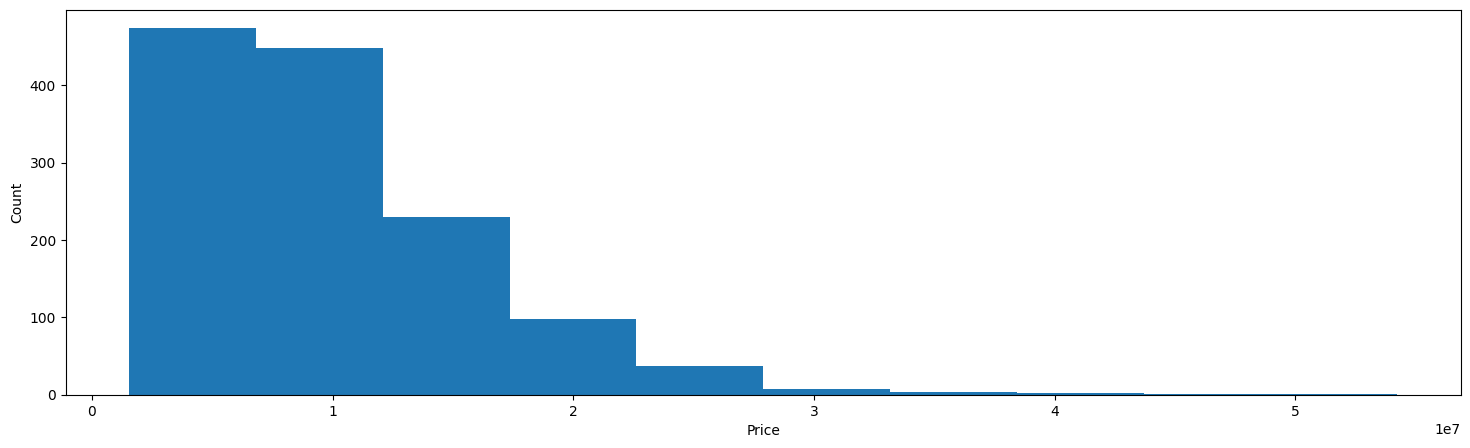

In [ ]:
plt.figure(figsize=(18,5))
plt.hist(data["Price"])
plt.xlabel("Price")
plt.ylabel('Count')
plt.show()

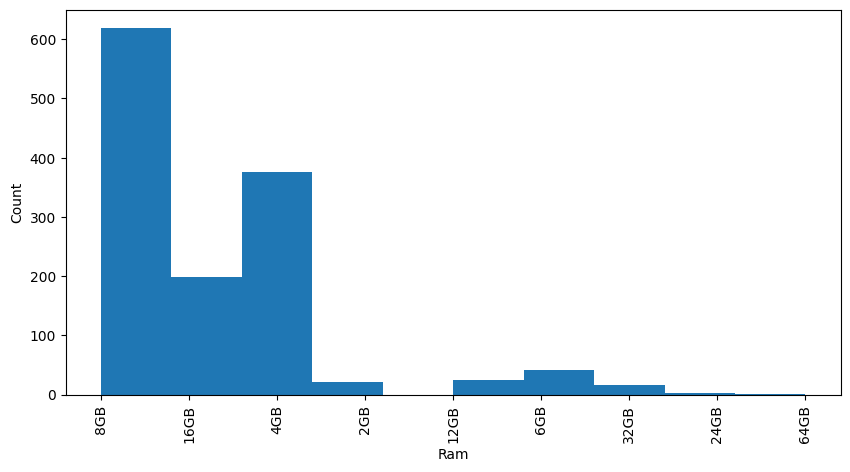

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data["RAM"])
plt.xticks(rotation='vertical')
plt.xlabel("Ram")
plt.ylabel('Count')
# plt.yticks(rotation='vertical')
plt.show()

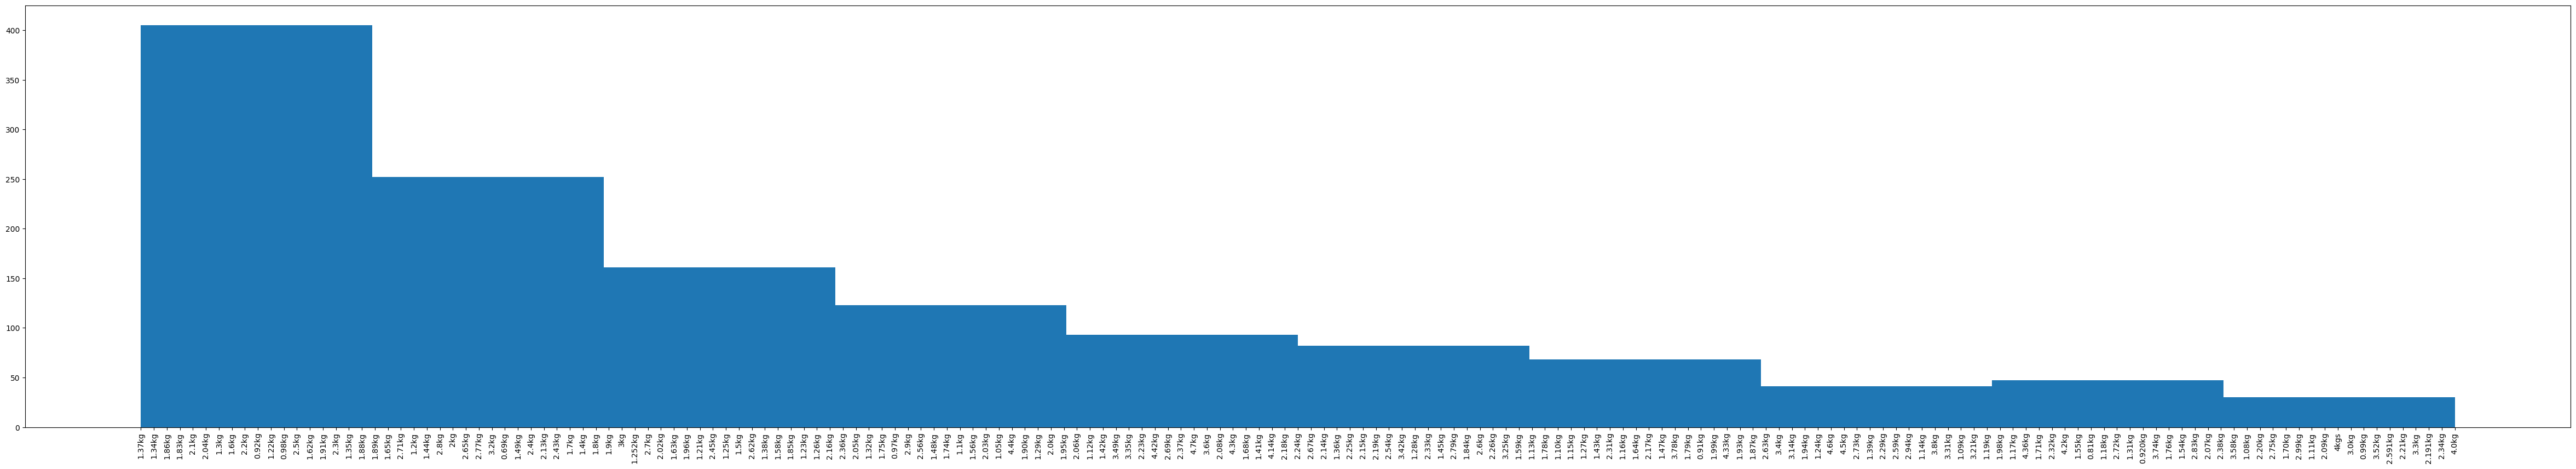

In [ ]:
plt.figure(figsize=(60,10))
plt.hist(data["Weight"])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64

In [ ]:
data = data.drop('Operating System Version',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen Size       1302 non-null   object 
 4   Screen            1302 non-null   object 
 5   CPU               1302 non-null   object 
 6   RAM               1302 non-null   object 
 7    Storage          1302 non-null   object 
 8   GPU               1302 non-null   object 
 9   Operating System  1302 non-null   object 
 10  Weight            1302 non-null   object 
 11  Price             1302 non-null   float64
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [ ]:
data = data.rename(columns={' Storage':'Storage'})

In [ ]:
data['Wt'] = data['Weight'].apply(lambda x: x.split('k')[0])
data['R'] = data['RAM'].apply(lambda x: x.split('G')[0])
data['SS'] = data['Screen Size'].apply(lambda x: x.split('\"')[0])

In [ ]:
data.head(20)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Wt,R,SS
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20,1.37,8,13.3
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,2.1kg,3556800.00,2.1,4,15.6
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,2.04kg,19028613.24,2.04,16,15.4
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,10303160.40,1.34,8,13.3
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,1.3kg,13293540.00,1.3,16,14.0
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,1.6kg,6846840.00,1.6,8,14.0


In [ ]:
data = data.drop(['Weight','Screen Size','RAM'],axis=1)
data = data.rename(columns={'SS':'Screen Size'})
data = data.rename(columns={'R':'RAM'})
data = data.rename(columns={'Wt':'Weight'})
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   object 
 10  RAM               1302 non-null   object 
 11  Screen Size       1302 non-null   object 
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [ ]:
data['RAM'] = data['RAM'].astype('int64')
data['Screen Size'] = data['Screen Size'].astype('float64')
data['Weight'] = data['Weight'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 132.2+ KB


<Axes: xlabel='Price', ylabel='Count'>

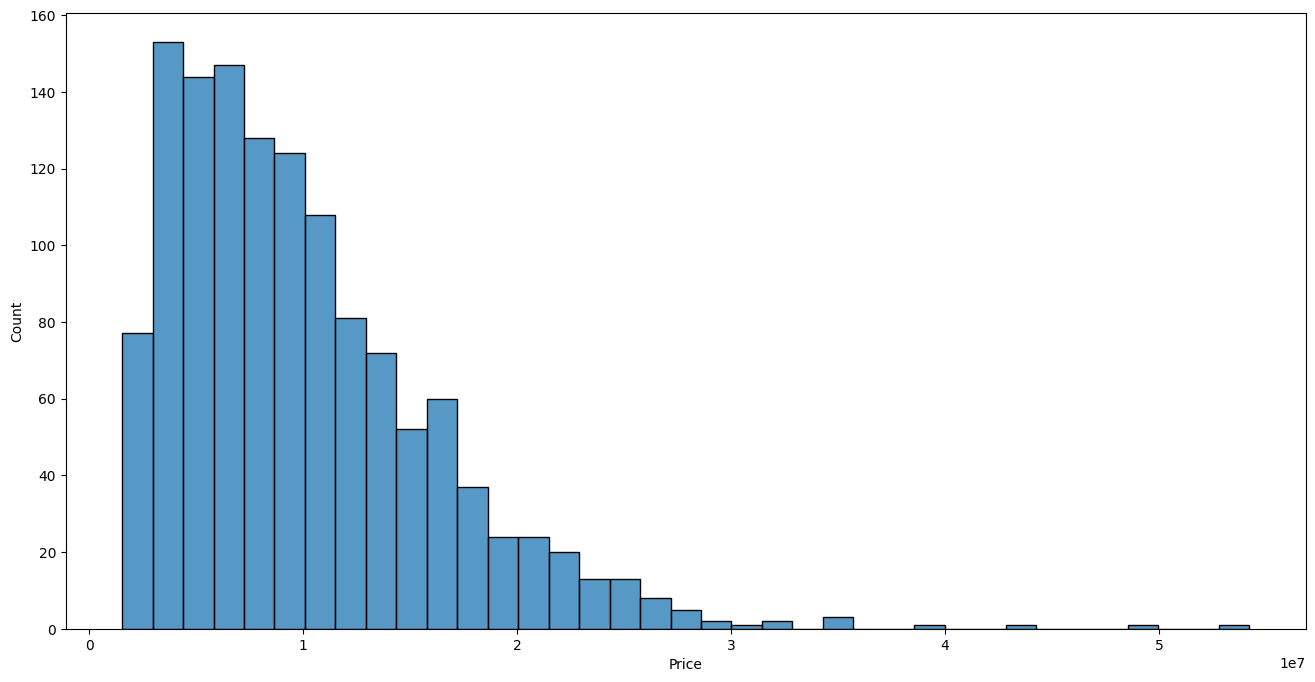

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(data['Price'])

<Axes: >

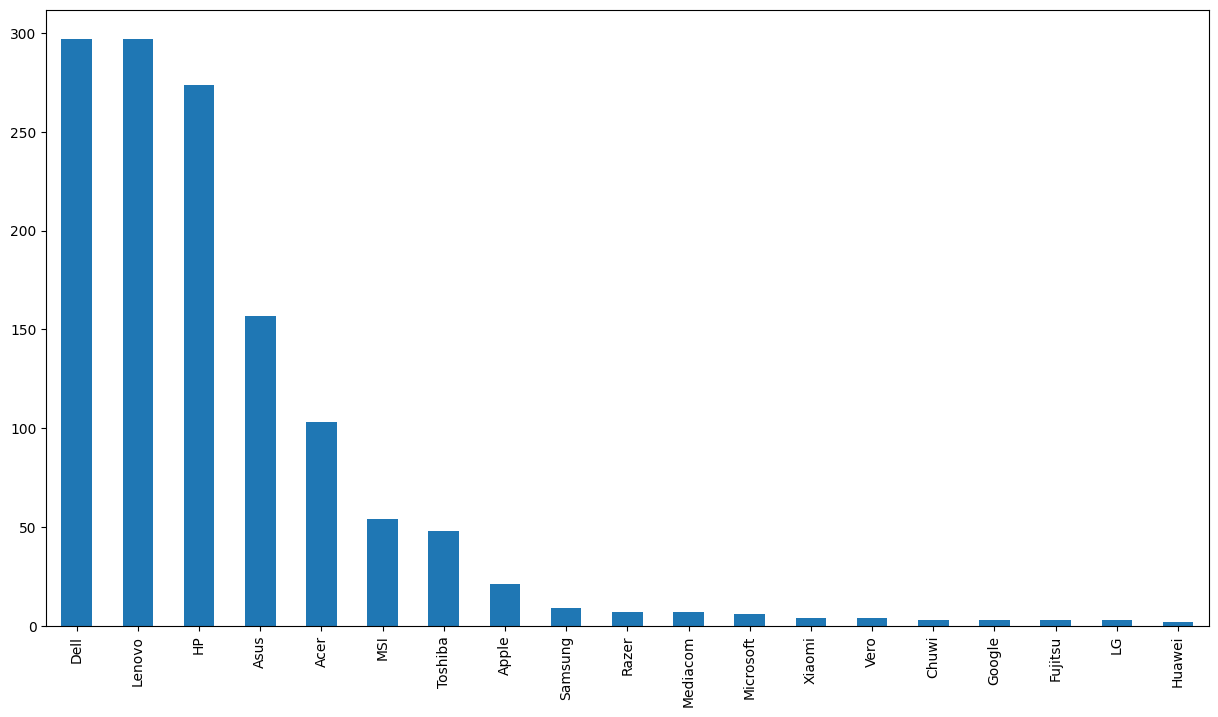

In [ ]:
plt.figure(figsize=(15,8))
data['Manufacturer'].value_counts().plot(kind='bar')

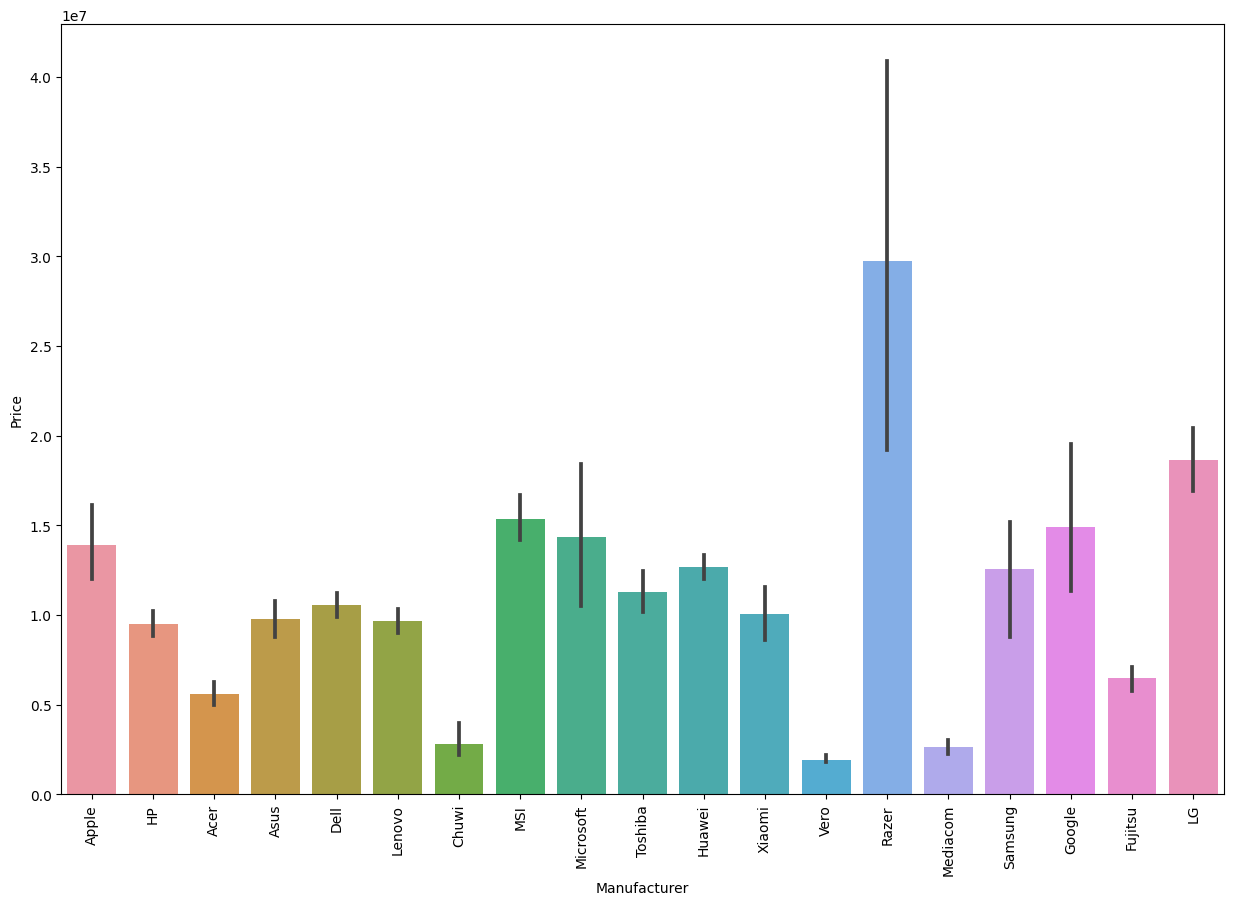

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = data['Manufacturer'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

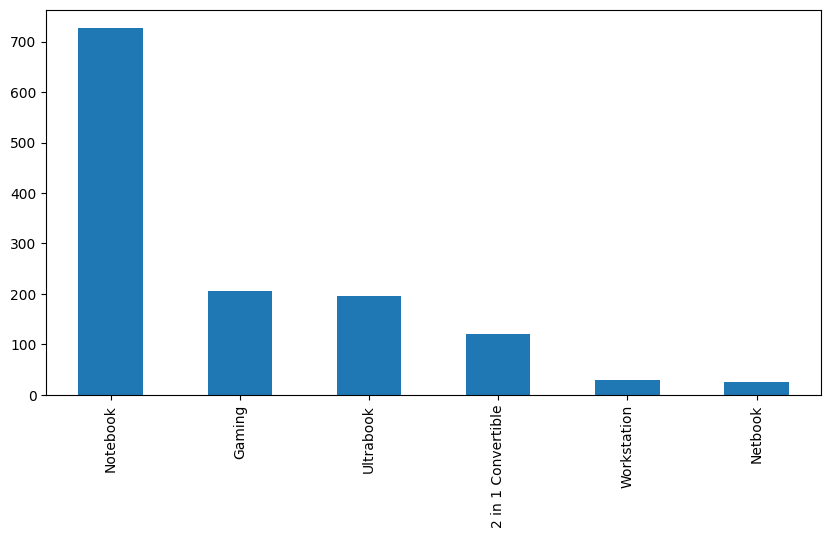

In [ ]:
plt.figure(figsize=(10,5))
data['Category'].value_counts().plot(kind='bar')

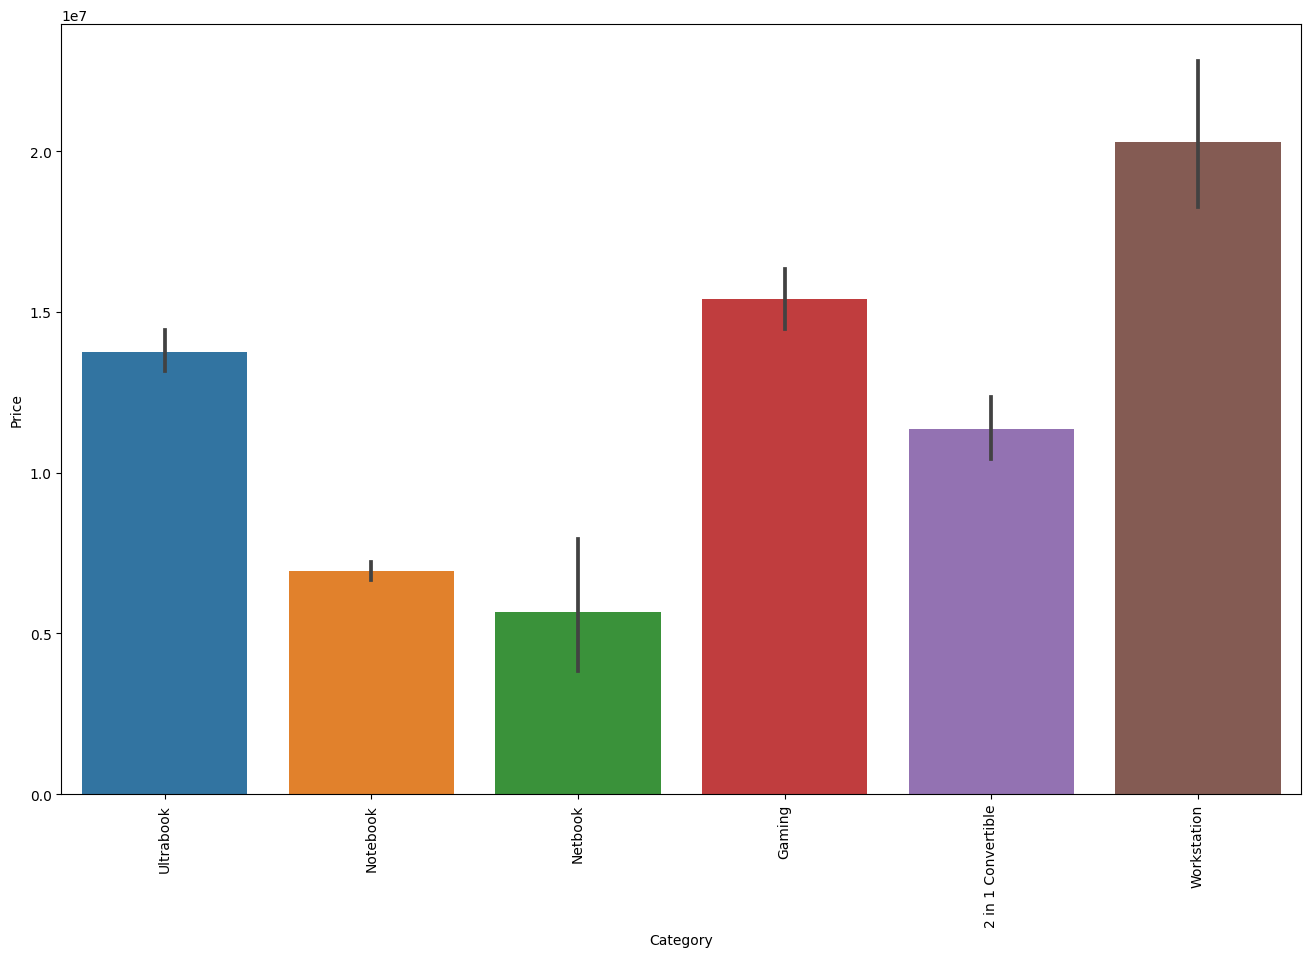

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x = data['Category'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

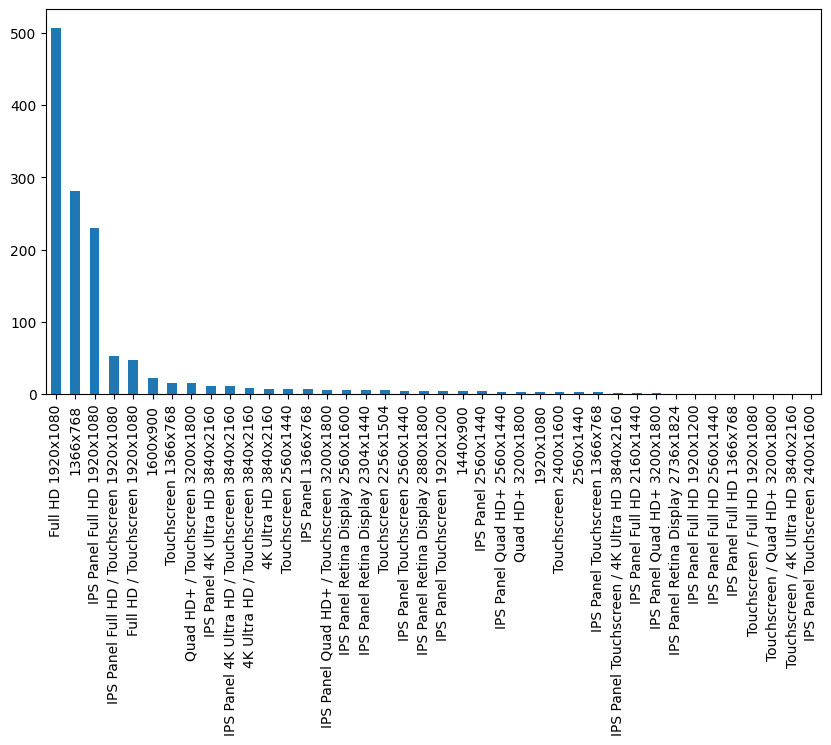

In [ ]:
plt.figure(figsize=(10,5))
data['Screen'].value_counts().plot(kind='bar')

In [ ]:
data['TouchScreen'] = data['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data.sample(20)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen
387,Dell,Precision 3510,Workstation,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,500GB HDD,AMD FirePro W5130M,Windows,12173148.00,2.23,8,15.6,0
633,Lenovo,Ideapad 320-15ISK,Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,1TB HDD,Nvidia GeForce 920MX,Windows,5148468.00,2.20,4,15.6,0
265,Dell,Inspiron 7779,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,512GB SSD,Nvidia GeForce 940MX,Windows,15996708.00,2.77,16,17.3,1
45,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,256GB SSD,Intel Iris Graphics 540,macOS,12617748.00,1.37,8,13.3,0
347,Dell,Latitude 5590,Ultrabook,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,512GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows,14297980.32,1.88,16,15.6,0
634,Asus,X541NA-GO414T (N3350/8GB/1TB/W10),Notebook,1366x768,Intel Celeron Dual Core N3350 1.1GHz,1TB HDD,Intel HD Graphics 500,Windows,3547908.00,2.00,8,15.6,0
266,Asus,ZenBook Flip,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,512GB SSD + 512GB SSD,Intel UHD Graphics 620,Windows,13329108.00,1.10,8,13.3,1
333,Lenovo,V310-15ISK (i3-6006U/4GB/1TB/FHD/W10),Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,1TB HDD,Intel HD Graphics 520,Windows,3992508.00,1.85,4,15.6,0
242,Asus,F756UX-T4201D (i7-7500U/8GB/128GB,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,7904988.00,2.69,8,17.3,0
765,Acer,TravelMate P238-M,Notebook,1366x768,Intel Core i5 6200U 2.3GHz,128GB SSD,Intel HD Graphics 520,Windows,5824260.00,1.60,4,13.3,0


<Axes: xlabel='TouchScreen', ylabel='Price'>

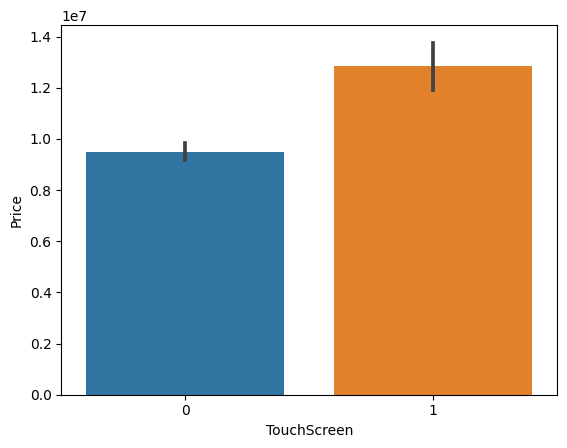

In [ ]:
sns.barplot(x = data['TouchScreen'], y = data['Price'])

In [ ]:
data['Ips'] = data['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips
359,Dell,Latitude 7480,Notebook,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,256GB SSD,Intel HD Graphics 620,Windows,12688884.0,1.36,8,14.0,0,0
713,Asus,VivoBook E403NA,Notebook,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,32GB Flash Storage,Intel HD Graphics 500,Windows,2649816.0,1.50,4,14.0,0,0
59,Toshiba,Tecra Z40-C-136,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,256GB SSD,Intel HD Graphics 520,Windows,15338700.0,1.47,8,14.0,0,1
812,Samsung,Notebook 9,Ultrabook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows,13329108.0,0.81,8,13.3,0,0
873,Lenovo,Thinkpad 13,Notebook,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,1GB SSD,Intel HD Graphics 620,Windows,6535620.0,1.44,4,13.3,0,1


<Axes: xlabel='Ips', ylabel='Price'>

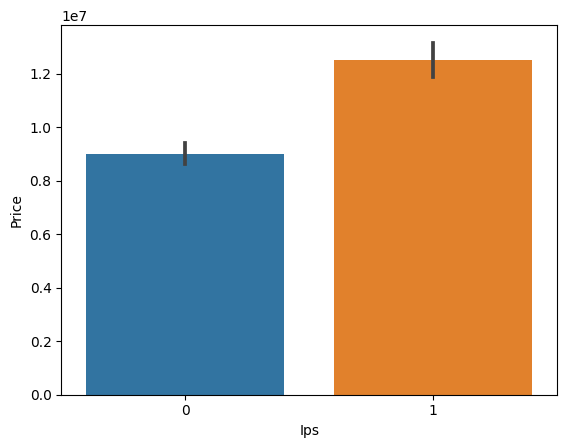

In [ ]:
sns.barplot(x = data['Ips'], y = data['Price'])

In [ ]:
new = data['Screen'].str.split('x',n=1,expand=True)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips
473,Dell,Latitude 7390,Ultrabook,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,16377730.2,1.42,8,13.3,1,0
907,Acer,Chromebook CB5-571-C1DZ,Notebook,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,16GB Flash Storage,Intel HD Graphics,Chrome OS,3192228.0,2.20,4,15.6,0,1
705,Dell,Vostro 5568,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows,7069140.0,2.18,8,15.6,0,0
238,Acer,E5 774G,Notebook,1600x900,Intel Core i3 6006U 2GHz,1TB HDD,Nvidia GeForce 940MX,Windows,5317416.0,3.30,4,17.3,0,0
894,MSI,GS73VR Stealth,Gaming,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows,23554908.0,2.43,16,17.3,0,1


In [ ]:
data['X_reso'] = new[0]
data['Y_reso'] = new[1]
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
data['X_reso'] = data['X_reso'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,2560,1600


In [ ]:
data['X_reso'] = data['X_reso'].astype('int64')
data['Y_reso'] = data['Y_reso'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5   Storage           1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
 12  TouchScreen       1302 non-null   int64  
 13  Ips               1302 non-null   int64  
 14  X_reso            1302 non-null   int64  
 15  Y_reso            1302 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory u

In [ ]:
data.corr()['Price']

<ipython-input-35-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Price          1.000000
Weight         0.210166
RAM            0.742802
Screen Size    0.067922
TouchScreen    0.189931
Ips            0.252799
X_reso         0.557129
Y_reso         0.553289
Name: Price, dtype: float64

Finding PPI(Pixels Per square Inch)<br>
Formula:<br>
PPI = ((x_reso^2 + y_reso^2)^1/2)/inches

In [ ]:
data['ppi'] = (((data['X_reso']**2 + data['Y_reso']**2)**0.5)/data['Screen Size']).astype('float64')

In [ ]:
data['resolution'] = data['X_reso'] * data['Y_reso']
data['resolution'] = data['resolution'].astype('int64')


In [ ]:
data.corr()['Price']

<ipython-input-38-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Price          1.000000
Weight         0.210166
RAM            0.742802
Screen Size    0.067922
TouchScreen    0.189931
Ips            0.252799
X_reso         0.557129
Y_reso         0.553289
ppi            0.473125
resolution     0.516261
Name: Price, dtype: float64

In [ ]:
data = data.drop(['X_reso','Y_reso','Screen Size','Screen'],axis=1)
data.head(20)

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000
5,Acer,Aspire 3,Notebook,AMD A9-Series 9420 3GHz,500GB HDD,AMD Radeon R5,Windows,3556800.00,2.10,4,0,0,100.454670,1049088
6,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.2GHz,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,19028613.24,2.04,16,0,1,220.534624,5184000
7,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,256GB Flash Storage,Intel HD Graphics 6000,macOS,10303160.40,1.34,8,0,0,127.677940,1296000
8,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7 8550U 1.8GHz,512GB SSD,Nvidia GeForce MX150,Windows,13293540.00,1.30,16,0,0,157.350512,2073600
9,Acer,Swift 3,Ultrabook,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,6846840.00,1.60,8,0,1,157.350512,2073600


In [ ]:
data['cpu'] = data['CPU'].apply(lambda x: " ".join(x.split()[0:3]))
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5


Creating a function and dividing the CPUs to 5 Categories:
<ul>
    <li>Intel i3</li>
    <li>Intel i5</li>
    <li>Intel i7</li>
    <li>Other Intel Processors</li>
    <li>Apple Processor</li>
    <li>AMD</li>
    
</ul>

In [ ]:
def fetch_processor(text):
    if text in ['Intel Core i5','Intel Core i7','Intel Core i3','Intel Core i9']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif text.upper() in ['M1','M2','M1 PRO','M2 PRO']:
      return 'Apple Processor'
    else:
      return 'AMD Processor'


In [ ]:
data['Cpu brand'] = data['cpu'].apply(fetch_processor)

In [ ]:
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu,Cpu brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,Intel Core i5


In [ ]:
data['Clock Speed'] = data['CPU'].str.findall(r'(\d+\.?\d?)').apply(lambda x: x[-1] if len(x) > 0 else 0)

data.sample(20)


,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,cpu,Cpu brand,Clock Speed
287,Asus,VivoBook S15,Ultrabook,Intel Core i5 7200U 2.5GHz,256GB SSD,Nvidia GeForce 940MX,Windows,8687484.00,1.70,8,0,0,141.211998,2073600,Intel Core i5,Intel Core i5,2.5
929,HP,ProBook 640,Notebook,Intel Core i5 6200U 2.3GHz,500GB HDD,Intel HD Graphics 520,Windows,10216908.00,1.95,4,0,0,111.935204,1049088,Intel Core i5,Intel Core i5,2.3
83,Lenovo,IdeaPad 320-15AST,Notebook,AMD A6-Series 9220 2.5GHz,128GB SSD,AMD R4 Graphics,Windows,3547908.00,2.20,4,0,0,141.211998,2073600,AMD A6-Series 9220,AMD Processor,2.5
93,HP,ProBook 650,Notebook,Intel Core i5 6200U 2.3GHz,500GB HDD,Intel HD Graphics 520,Windows,10661508.00,2.31,4,0,0,100.454670,1049088,Intel Core i5,Intel Core i5,2.3
258,HP,EliteBook 840,Ultrabook,Intel Core i7 6500U 2.5GHz,256GB SSD,Intel HD Graphics 520,Windows,19546305.48,1.54,8,0,0,209.800683,3686400,Intel Core i7,Intel Core i7,2.5
463,Lenovo,IdeaPad 510s-14IKB,Notebook,Intel Core i7 7500U 2.7GHz,512GB SSD,AMD Radeon R7 M460,No OS,7104708.00,1.50,8,0,1,157.350512,2073600,Intel Core i7,Intel Core i7,2.7
538,HP,Omen 15-ce006nv,Gaming,Intel Core i7 7700HQ 2.8GHz,1TB HDD,Nvidia GeForce GTX 1060,Windows,15996708.00,2.62,12,0,0,127.335675,2073600,Intel Core i7,Intel Core i7,2.8
229,HP,ZBook 15u,Notebook,Intel Core i7 7500U 2.7GHz,1TB HDD,AMD FirePro W4190M,Windows,11283948.00,1.90,8,0,0,141.211998,2073600,Intel Core i7,Intel Core i7,2.7
706,Acer,Spin 5,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows,8883108.00,1.60,8,1,1,165.632118,2073600,Intel Core i5,Intel Core i5,1.6
931,HP,EliteBook 820,Ultrabook,Intel Core i5 6200U 2.3GHz,500GB HDD,Intel HD Graphics 520,Windows,14040468.00,1.26,4,0,0,176.232574,2073600,Intel Core i5,Intel Core i5,2.3


<Axes: xlabel='Clock Speed', ylabel='Price'>

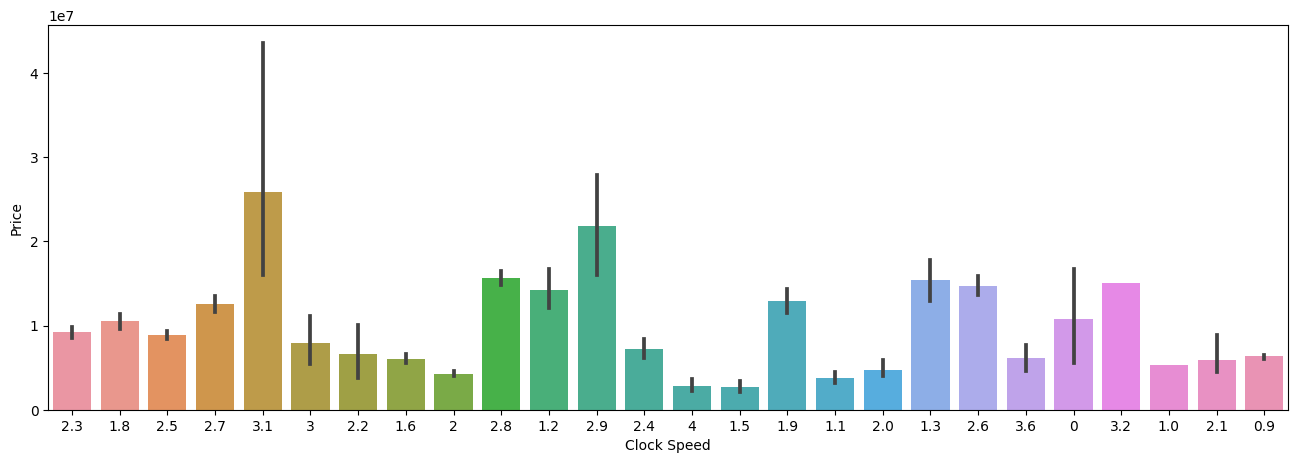

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x = data['Clock Speed'], y = data['Price'])


In [ ]:
mode_clock_speed = data['Clock Speed'].astype('float64').mode()
print(mode_clock_speed[0])

2.5


In [ ]:
data['Clock Speed'] = data['Clock Speed'].apply(lambda x: mode_clock_speed[0] if x == "0" else x)

<Axes: xlabel='Clock Speed', ylabel='Price'>

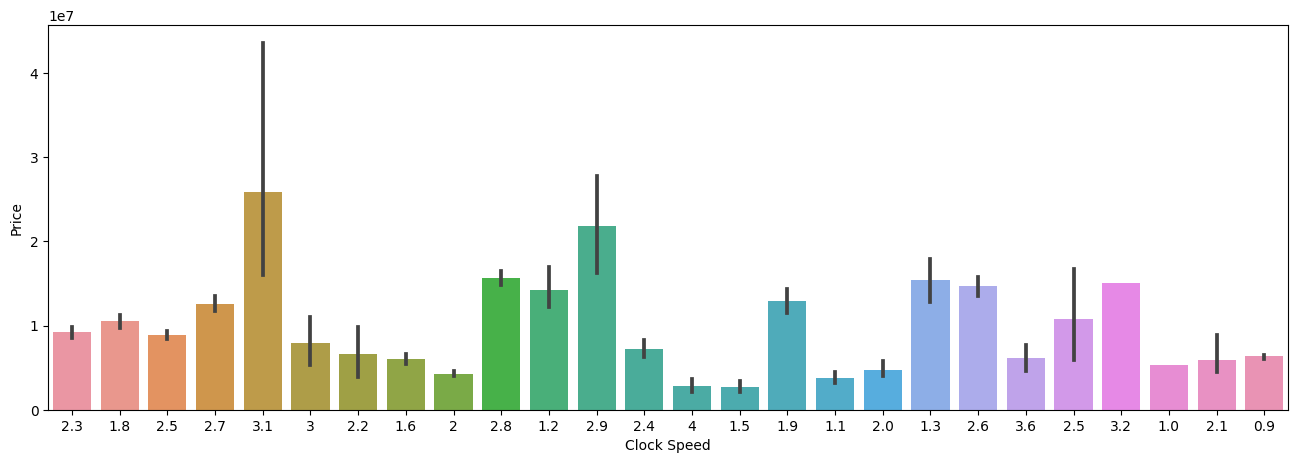

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x = data['Clock Speed'], y = data['Price'])

<Axes: >

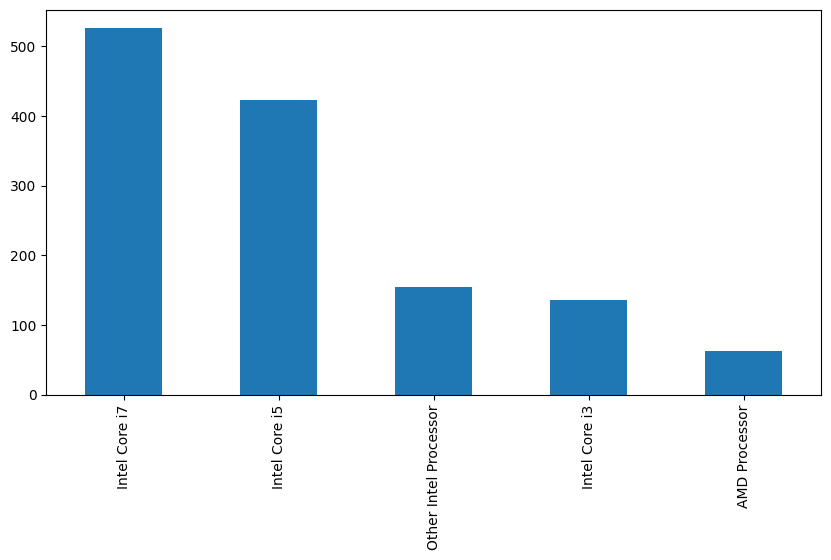

In [ ]:
plt.figure(figsize=(10,5))
data['Cpu brand'].value_counts().plot(kind='bar')

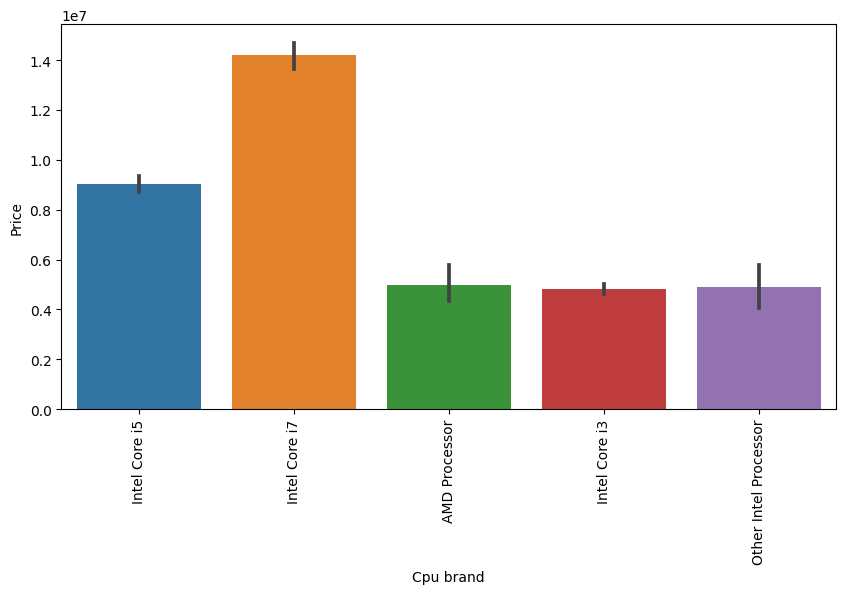

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['Cpu brand'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.drop(columns=['CPU','cpu'],inplace=True)
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1


<Axes: >

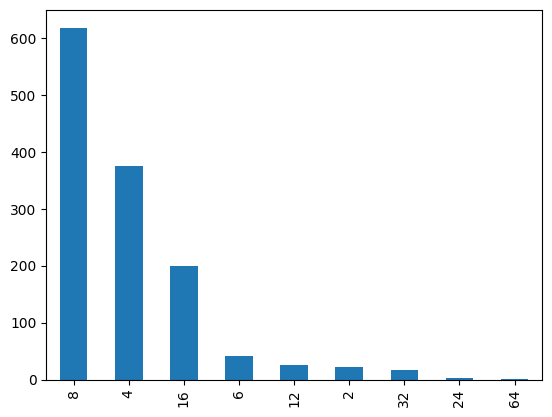

In [ ]:
data['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

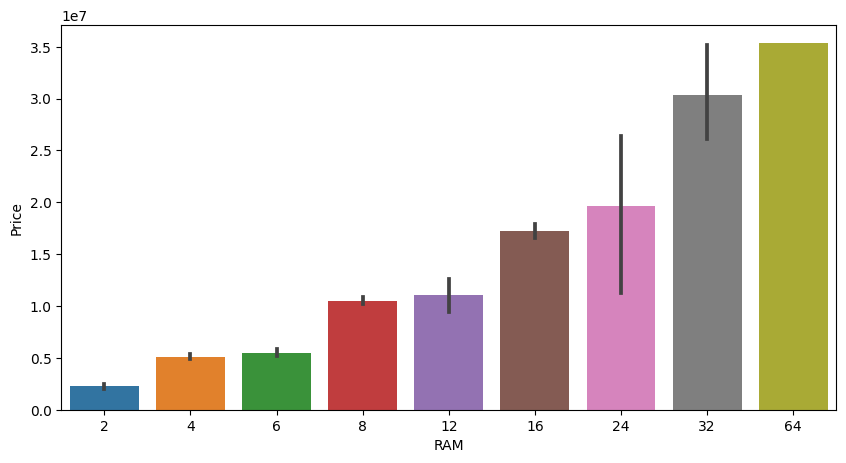

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['RAM'], y = data['Price'])

In [ ]:
data['Storage'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1


In [ ]:
new = data['Storage'].str.split('+',n=1,expand=True)
print(new)
# data['Storage'].shape
data['first'] = new[0]
data['first'] = data['first'].str.strip()
data['sec'] = new[1].str.strip()


                       0     1
0              128GB SSD  None
1    128GB Flash Storage  None
2              256GB SSD  None
3              512GB SSD  None
4              256GB SSD  None
..                   ...   ...
320            128GB SSD  None
321            512GB SSD  None
322   64GB Flash Storage  None
323              1TB HDD  None
324            500GB HDD  None

[1302 rows x 2 columns]


In [ ]:
data['l1hdd'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['l1ssd'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['l1hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l1fs'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first'] = data['first'].str.replace(r'\D','')
# str.replace(r'\D','') is replacing all non-digit characters in the string
data['sec'].fillna('0',inplace=True)

<ipython-input-57-354fc04aae49>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D','')


In [ ]:
data['l2hdd'] = data['sec'].apply(lambda x: 1 if "HDD" in x else 0)
data['l2ssd'] = data['sec'].apply(lambda x: 1 if "SSD" in x else 0)
data['l2hybrid'] = data['sec'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l2fs'] = data['sec'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['sec'] = data['sec'].str.replace(r'\D','')

<ipython-input-58-e5a3f235537f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sec'] = data['sec'].str.replace(r'\D','')


In [ ]:
data['first'] = data['first'].astype('int')
data['sec'] = data['sec'].astype('int')
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,...,first,sec,l1hdd,l1ssd,l1hybrid,l1fs,l2hdd,l2ssd,l2hybrid,l2fs
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,...,256,0,0,1,0,0,0,0,0,0


In [ ]:
data['HDD'] = data['first']*data['l1hdd'] + data['sec']*data['l2hdd']
data['SSD'] = data['first']*data['l1ssd'] + data['sec']*data['l2ssd']
data['Hybrid'] = data['first']*data['l1hybrid'] + data['sec']*data['l2hybrid']
data['FS'] = data['first']*data['l1fs'] + data['sec']*data['l2fs']
# print(data.head())
data.drop(columns=['first','sec','l1hdd','l1ssd','l1hybrid','l1fs','l2hdd','l2ssd','l2fs','l2hybrid'],inplace=True)

In [ ]:
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,0,0
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,0,128
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,0,0


In [ ]:
data.drop(columns=['Storage'],inplace=True)
data.sample(5)

,Manufacturer,Model Name,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
89,Dell,XPS 13,Ultrabook,Intel UHD Graphics 620,Windows,14662908.0,1.21,8,0,1,165.632118,2073600,Intel Core i7,1.8,0,256,0,0
838,Lenovo,N42-20 Chromebook,Notebook,Intel HD Graphics 400,Chrome OS,2889900.0,1.50,4,0,0,111.935204,1049088,Other Intel Processor,1.6,0,0,0,16
684,Lenovo,Yoga 730,2 in 1 Convertible,Intel UHD Graphics 620,Windows,13329108.0,1.19,8,1,1,165.632118,2073600,Intel Core i7,1.8,0,512,0,0
39,HP,ProBook 450,Notebook,Nvidia GeForce 930MX,Windows,7816068.0,2.10,8,0,0,141.211998,2073600,Intel Core i5,1.6,0,256,0,0
62,Lenovo,IdeaPad 520S-14IKB,Notebook,Intel HD Graphics 620,No OS,5326308.0,1.70,8,0,1,157.350512,2073600,Intel Core i3,2.7,0,256,0,0


In [ ]:
data = data.drop('Model Name',axis=1)
data.sample(5)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,Hybrid,FS
776,Lenovo,Notebook,Nvidia Quadro M2000M,Windows,21074040.0,2.50,16,0,0,282.423996,8294400,Intel Core i7,2.7,0,512,0,0
900,Dell,2 in 1 Convertible,Intel HD Graphics 615,Windows,17900485.2,1.24,8,1,0,276.053530,5760000,Intel Core i7,1.3,0,512,0,0
612,Dell,Notebook,Intel HD Graphics 520,Linux,3947158.8,2.18,4,0,0,100.454670,1049088,Intel Core i3,2.0,1,0,0,0
658,Lenovo,Gaming,Nvidia GeForce GTX 960,Windows,10634832.0,3.31,8,0,1,141.211998,2073600,Intel Core i7,2.6,1,128,0,0
198,HP,Gaming,Nvidia GeForce GTX 1050,Windows,12262068.0,3.35,16,0,1,127.335675,2073600,Intel Core i7,2.8,1,256,0,0


In [ ]:
data = data.rename(columns={'Ips':'IPS'})

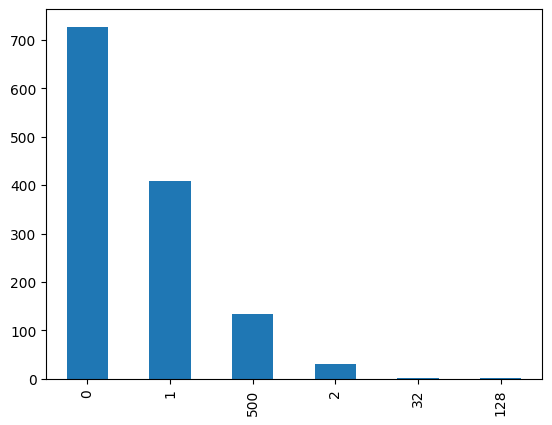

In [ ]:
data['HDD'].value_counts().plot(kind='bar')
plt.show()
data['HDD'] = data['HDD'].apply(lambda x: x*1024 if x==1 or x==2 else x)


In [ ]:
data.corr()['Price']

<ipython-input-66-6b59db53f049>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Price          1.000000
Weight         0.210166
RAM            0.742802
TouchScreen    0.189931
IPS            0.252799
ppi            0.473125
resolution     0.516261
HDD           -0.097533
SSD            0.545948
Hybrid        -0.004750
FS            -0.040414
Name: Price, dtype: float64

Dropping Hybrid and Flash Storage as they have very less correlation with price

In [ ]:
data.drop(columns={'Hybrid','FS'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Category          1302 non-null   object 
 2   GPU               1302 non-null   object 
 3   Operating System  1302 non-null   object 
 4   Price             1302 non-null   float64
 5   Weight            1302 non-null   float64
 6   RAM               1302 non-null   int64  
 7   TouchScreen       1302 non-null   int64  
 8   IPS               1302 non-null   int64  
 9   ppi               1302 non-null   float64
 10  resolution        1302 non-null   int64  
 11  Cpu brand         1302 non-null   object 
 12  Clock Speed       1302 non-null   object 
 13  HDD               1302 non-null   int64  
 14  SSD               1302 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 162.8+ KB


Converting to Indian Currency

In [ ]:
data['Price'] = data['Price']/100
data.head(10)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.2348,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.7448,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.0000,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.0540,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.1120,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256
5,Acer,Notebook,AMD Radeon R5,Windows,35568.0000,2.10,4,0,0,100.454670,1049088,AMD Processor,3,500,0
6,Apple,Ultrabook,Intel Iris Pro Graphics,Mac OS,190286.1324,2.04,16,0,1,220.534624,5184000,Intel Core i7,2.2,0,0
7,Apple,Ultrabook,Intel HD Graphics 6000,macOS,103031.6040,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
8,Asus,Ultrabook,Nvidia GeForce MX150,Windows,132935.4000,1.30,16,0,0,157.350512,2073600,Intel Core i7,1.8,0,512
9,Acer,Ultrabook,Intel UHD Graphics 620,Windows,68468.4000,1.60,8,0,1,157.350512,2073600,Intel Core i5,1.6,0,256


In [ ]:
data['Price'] = data['Price'].round(decimals = 2)
data.head()

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256


In [ ]:
data['gpu'] = data['GPU'].apply(lambda x:x.split()[0])
data['gpu'].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: gpu, dtype: int64

<Axes: xlabel='gpu', ylabel='Price'>

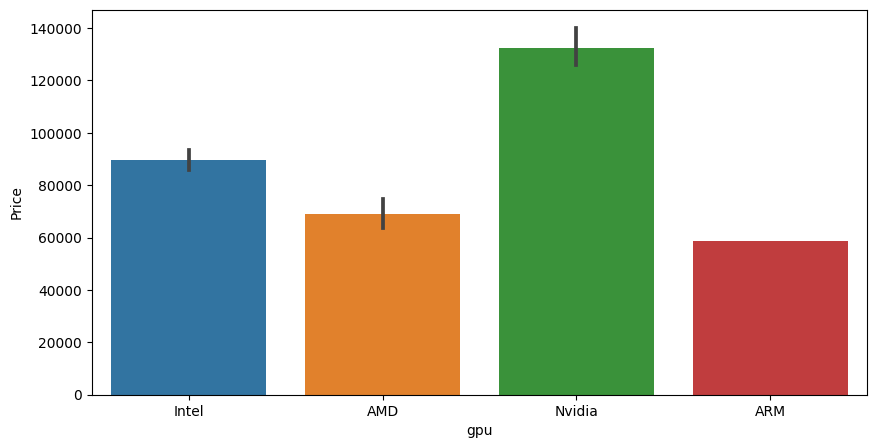

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['gpu'], y = data['Price'])


In [ ]:
data = data[data['gpu'] != 'ARM']
data['gpu'].value_counts()

Intel     722
Nvidia    399
AMD       180
Name: gpu, dtype: int64

<Axes: xlabel='gpu', ylabel='Price'>

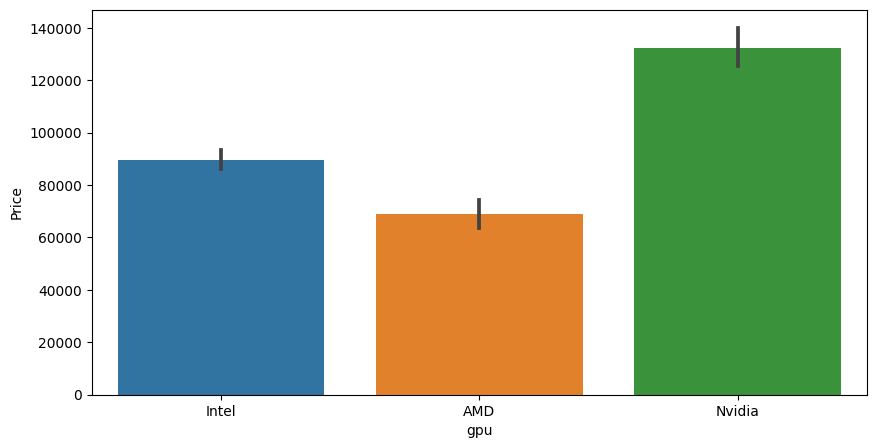

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['gpu'], y = data['Price'])

In [ ]:
data = data.drop('GPU',axis=1)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel


In [ ]:
data['Operating System'].value_counts()

Windows      1124
No OS          66
Linux          62
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: Operating System, dtype: int64

<Axes: xlabel='Operating System', ylabel='Price'>

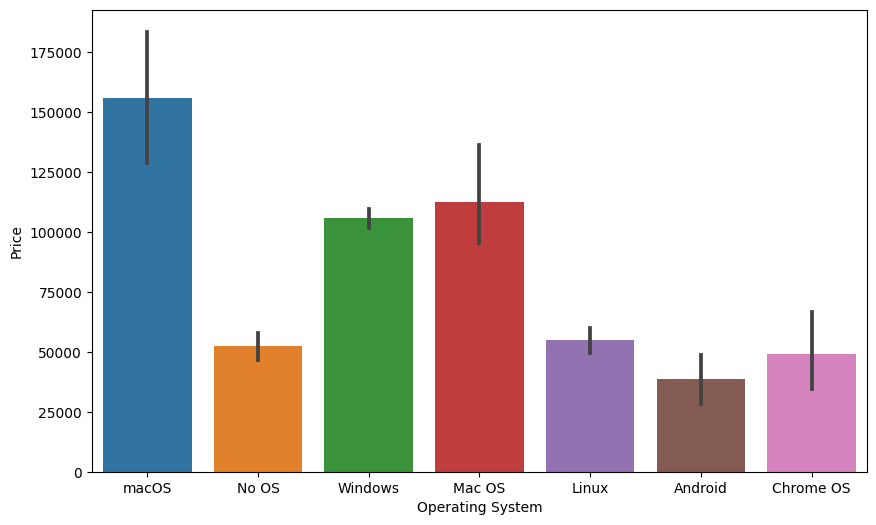

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['Operating System'], y = data['Price'])

In [ ]:
def merge_os(os):
    if os == 'Windows':
        return os
    elif os == 'macOS' or os == 'Mac OS':
        return 'Mac'
    elif os == 'Linux':
        return os
    else:
        return 'Others/No OS'

In [ ]:
data['OS'] = data['Operating System'].apply(merge_os)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu,OS
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel,Mac


In [ ]:
data.drop(columns=['Operating System'],inplace=True)
data.head()

,Manufacturer,Category,Price,Weight,RAM,TouchScreen,IPS,ppi,resolution,Cpu brand,Clock Speed,HDD,SSD,gpu,OS
0,Apple,Ultrabook,119125.23,1.37,8,0,1,226.983005,4096000,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,79933.74,1.34,8,0,0,127.677940,1296000,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,51129.00,1.86,8,0,0,141.211998,2073600,Intel Core i5,2.5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,225630.05,1.83,16,0,1,220.534624,5184000,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,160376.11,1.37,8,0,1,226.983005,4096000,Intel Core i5,3.1,0,256,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

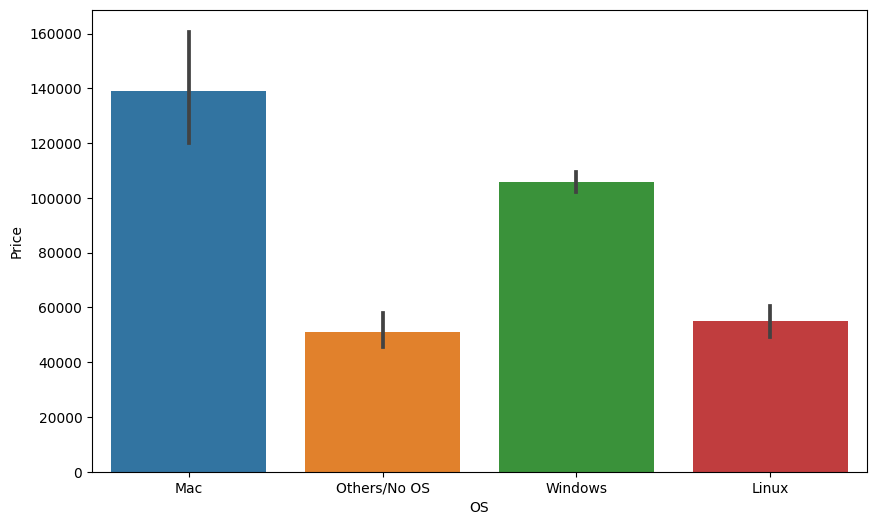

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['OS'], y = data['Price'])

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)


                Price    Weight       RAM  TouchScreen       IPS       ppi  \
Price        1.000000  0.209664  0.742700     0.191624  0.253911  0.475017   
Weight       0.209664  1.000000  0.383264    -0.294406  0.018835 -0.324095   
RAM          0.742700  0.383264  1.000000     0.116459  0.208877  0.303479   
TouchScreen  0.191624 -0.294406  0.116459     1.000000  0.149537  0.455483   
IPS          0.253911  0.018835  0.208877     0.149537  1.000000  0.301855   
ppi          0.475017 -0.324095  0.303479     0.455483  0.301855  1.000000   
resolution   0.517262 -0.044517  0.395717     0.348801  0.248563  0.920146   
HDD         -0.097982  0.515194  0.094586    -0.214989 -0.091309 -0.302736   
SSD          0.545736 -0.093513  0.463556     0.216629  0.219370  0.412770   

             resolution       HDD       SSD  
Price          0.517262 -0.097982  0.545736  
Weight        -0.044517  0.515194 -0.093513  
RAM            0.395717  0.094586  0.463556  
TouchScreen    0.348801 -0.214989  

<ipython-input-81-f50fb7f1b89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


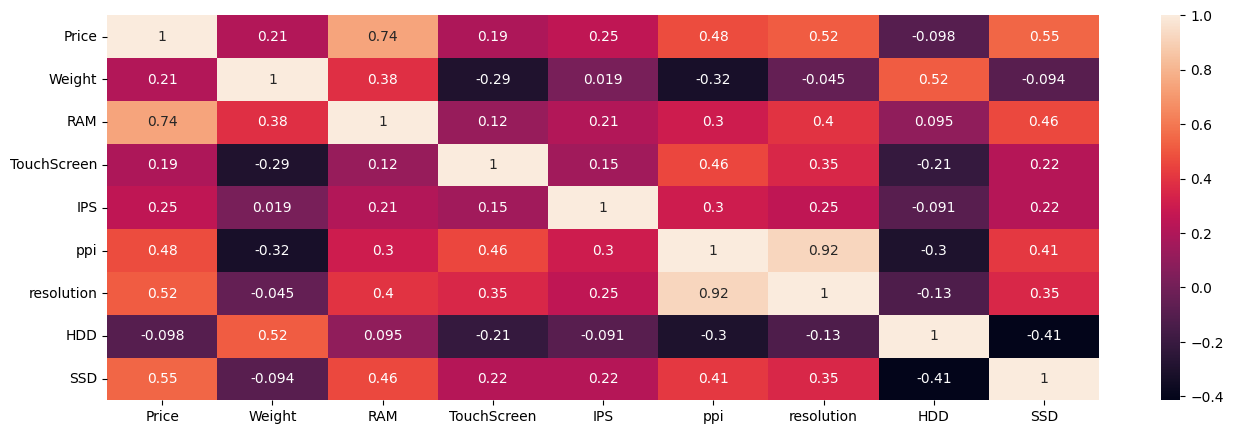

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

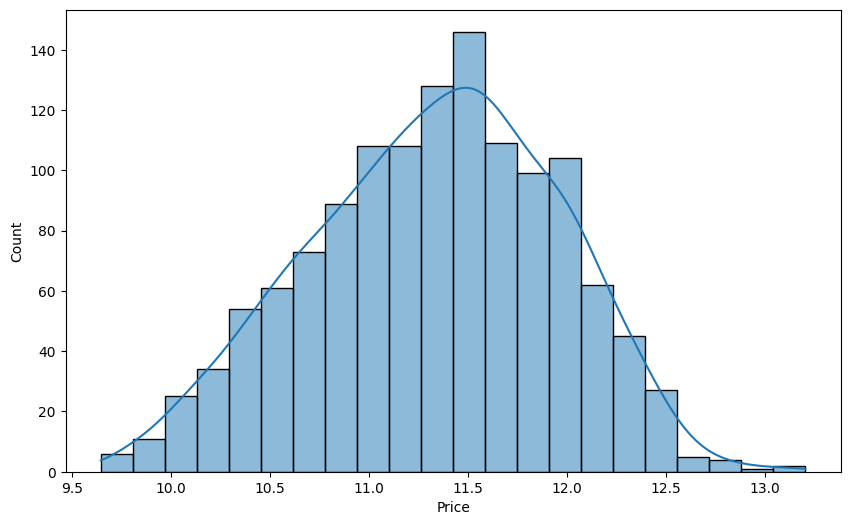

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(data['Price']),kde=True)
plt.show()

<h3><center> Prediction Model</center></h3>

In [ ]:
x = data.drop('Price',axis=1)
y = np.log(data['Price'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 324
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1301 non-null   object 
 1   Category      1301 non-null   object 
 2   Price         1301 non-null   float64
 3   Weight        1301 non-null   float64
 4   RAM           1301 non-null   int64  
 5   TouchScreen   1301 non-null   int64  
 6   IPS           1301 non-null   int64  
 7   ppi           1301 non-null   float64
 8   resolution    1301 non-null   int64  
 9   Cpu brand     1301 non-null   object 
 10  Clock Speed   1301 non-null   object 
 11  HDD           1301 non-null   int64  
 12  SSD           1301 non-null   int64  
 13  gpu           1301 non-null   object 
 14  OS            1301 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 162.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


## Linear Regression

In [ ]:
# df_subset = data.iloc[:,[0,1,9,12,13] ]
# print(df_subset)

# def plot_roc_curve(true_y, y_prob):
#     """
#     plots the roc curve based of the probabilities
#     """

#     fpr, tpr, thresholds = roc_curve(true_y, y_prob)
#     plt.plot(fpr, tpr)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')

lst = []

s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

lreg = LinearRegression()
pipe = Pipeline([
     ('s1',s1),
     ('lreg',lreg)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

lr = []
lr.append(r2_score(y_test,y_pred))
lr.append(mean_absolute_error(y_test,y_pred))
lr.append(mean_squared_error(y_test,y_pred))
lr.append(mean_squared_error(y_test,y_pred, squared=False))


print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

6

R2 Score:  0.7905303579205742
Mean Absolute Error (MAE):  0.21039794428654726
Mean Squared Error (MSE):  0.07614613235096941
Root Mean Squared Error (RMSE):  0.27594588663534997


6

## KNN

In [ ]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

knn = KNeighborsRegressor(n_neighbors=6)
pipe = Pipeline([
     ('s1',s1),
     ('s2',knn)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
knn_2 = []
knn_2.append(r2_score(y_test,y_pred))
knn_2.append(mean_absolute_error(y_test,y_pred))
knn_2.append(mean_squared_error(y_test,y_pred))
knn_2.append(mean_squared_error(y_test,y_pred, squared=False))


print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8252423495122345
Mean Absolute Error (MAE):  0.20051466654118028
Mean Squared Error (MSE):  0.0635276742313815
Root Mean Squared Error (RMSE):  0.2520469683042855


## Decision Tree

In [ ]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

dtr = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
     ('s1',s1),
     ('s2',dtr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

dtree = []
dtree.append(r2_score(y_test,y_pred))
dtree.append(mean_absolute_error(y_test,y_pred))
dtree.append(mean_squared_error(y_test,y_pred))
dtree.append(mean_squared_error(y_test,y_pred, squared=False))

print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7966652422286563
Mean Absolute Error (MAE):  0.20568714920363695
Mean Squared Error (MSE):  0.07391598717172682
Root Mean Squared Error (RMSE):  0.2718749476721362


## Random Forest Regression

In [ ]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,12,13])],remainder='passthrough')

rrr = RandomForestRegressor()
pipe = Pipeline([
     ('s1',s1),
     ('s2',rrr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

random_for = []

random_for.append(r2_score(y_test,y_pred))
random_for.append(mean_absolute_error(y_test,y_pred))
random_for.append(mean_squared_error(y_test,y_pred))
random_for.append(mean_squared_error(y_test,y_pred, squared=False))

print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8711029514639435
Mean Absolute Error (MAE):  0.15869481150852183
Mean Squared Error (MSE):  0.04685648774706111
Root Mean Squared Error (RMSE):  0.2164635945073931


<!--

n_bins = 10


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

# colors = ['red', 'tan', 'lime','blue']


ax0.hist(lr,n_bins)
# ax0.legend(prop={'size': 10})
ax0.set_title('Linear Regression')

ax1.hist(knn,n_bins)
ax1.set_title('KNN')

ax2.hist(dtree,n_bins)
ax2.set_title('Decision Tree')

ax3.hist(random_for,n_bins)
ax3.set_title('Random Forest Regression')

fig.tight_layout()
plt.show() -->

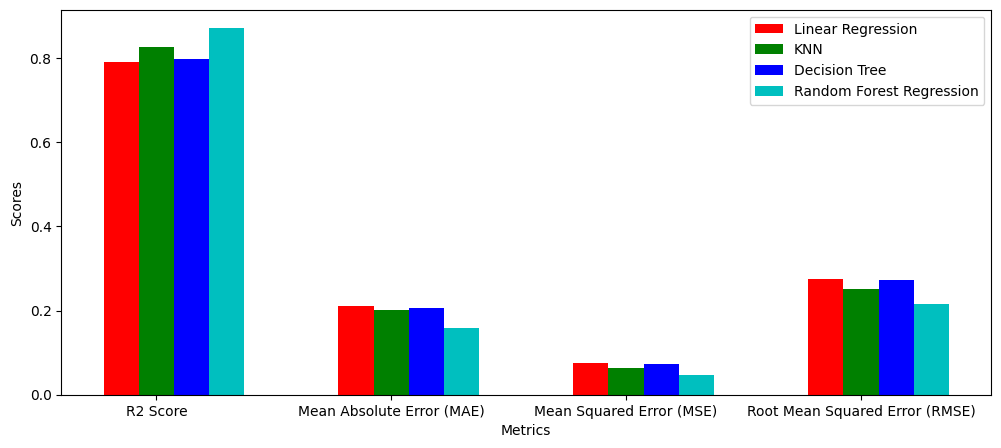

In [ ]:

N = 4
ind = np.arange(N)

width = 0.15

plt.figure(figsize=(12,5))

bar1 = plt.bar(ind, lr, width, color = 'r')

bar2 = plt.bar(ind+width, knn_2, width, color='g')


bar3 = plt.bar(ind+width*2, dtree, width, color = 'b')


bar4 = plt.bar(ind+width*3, random_for, width, color = 'c')

plt.xlabel("Metrics")
plt.ylabel('Scores')
#plt.title("Regression Model Comparing")
# plt.xticks(rotation='vertical')

plt.xticks(ind+width,['R2 Score', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)'])
plt.legend( (bar1, bar2, bar3,bar4), ('Linear Regression', 'KNN', 'Decision Tree','Random Forest Regression') )
plt.show()